In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import plasmarl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
p = plasmarl.PlasmaProblem()
p.initialize(path="data/shot_data.npz", shot_number=154077)

shot_number,X.shape,is_disruptive,disruption_time
148778 (6100, 142) False -1
154077 (2319, 142) True 2288
155579 (6040, 142) False -1
160588 (6037, 142) True 6006
159593 (3919, 142) True 3888
160594 (5769, 142) True 5738
165441 (5400, 142) False -1
165483 (6020, 142) False -1
171125 (6241, 142) False -1
180669 (6841, 142) False -1


In [3]:
m = plasmarl.FRNNMethod()
m.initialize("data/FRNN_sample_model.h5")

/home/dsuo/miniconda3/lib/python3.7/site-packages/keras/layers/recurrent.py:2208: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (128, 200, 142)      0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (128, 142, 200)      0           input_1[0][0]                    
__________________________________________________________________________________________________
cropping1d_1 (Cropping1D)       (128, 128, 200)      0           permute_1[0][0]                  
__________________________________________________________________________________________________
permute_2 (Permute)             (128, 200, 128)      0           cropping1d_1[0][0]               
____________________________________________________________________________________________

/home/dsuo/miniconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
data = np.load("data/shot_data.npz", allow_pickle=True)

In [10]:
shot_data = data["shot_data"].item()

In [11]:
k = 148778

In [12]:
x = shot_data[k]["X"]

In [13]:
x.shape

(6100, 142)

In [14]:
X=x[0:0+200]

In [15]:
X.shape

(200, 142)

In [16]:
np.tile(X, (128, 1, 1)).shape

(128, 200, 142)

In [18]:
y = m.model.predict(np.tile(X, (128, 1, 1)), batch_size=128)

In [19]:
y.shape

(128, 200, 1)

In [21]:
y[0,:,0].shape

(200,)

In [24]:
score = np.array([0])
score = np.concatenate((score, y[0,:,0]))

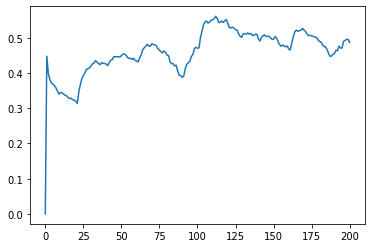

In [25]:
plt.plot(score)